### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

### Setting batch and image size, and importing the datasets 

In [3]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train = train.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val = val.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test = test.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


### Model that replicates the paper

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(16, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(16, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.MaxPooling2D(2)(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.008), activation='relu')(x)

x = layers.Dropout(0.3)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                         

In [5]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath="../models/2_replicate_paper.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

In [6]:
history = model.fit(
  train.cache(),
  epochs=40,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/40


2022-08-29 00:32:12.840853: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-29 00:32:12.840938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


118/120 [============================>.] - ETA: 0s - loss: 1.6172 - accuracy: 0.3922

2022-08-29 00:32:16.619726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 4s 27ms/step - loss: 1.6102 - accuracy: 0.3953 - val_loss: 1.1694 - val_accuracy: 0.6396
Epoch 2/40
120/120 [==============================] - 3s 25ms/step - loss: 1.0950 - accuracy: 0.6169 - val_loss: 0.8351 - val_accuracy: 0.7583
Epoch 3/40
120/120 [==============================] - 3s 23ms/step - loss: 0.8817 - accuracy: 0.7044 - val_loss: 0.6831 - val_accuracy: 0.7875
Epoch 4/40
120/120 [==============================] - 3s 23ms/step - loss: 0.7579 - accuracy: 0.7500 - val_loss: 0.6003 - val_accuracy: 0.8313
Epoch 5/40
120/120 [==============================] - 3s 23ms/step - loss: 0.6744 - accuracy: 0.7846 - val_loss: 0.5493 - val_accuracy: 0.8313
Epoch 6/40
120/120 [==============================] - 3s 23ms/step - loss: 0.6132 - accuracy: 0.8104 - val_loss: 0.4975 - val_accuracy: 0.8521
Epoch 7/40
120/120 [==============================] - 3s 23ms/step - loss: 0.5644 - accuracy: 0.8302 - val_loss: 0.5093 - val_accuracy: 0.8479
Epoch 8/40

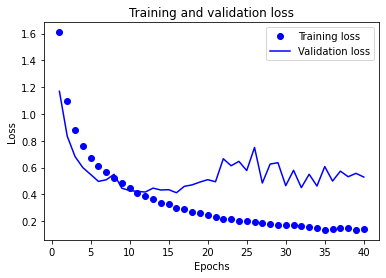

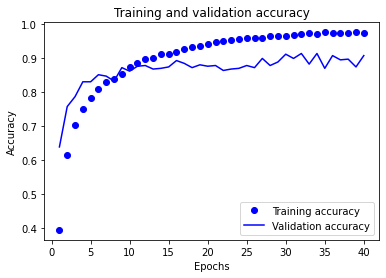

In [7]:
plot_loss(history)
plot_acc(history)

In [8]:
model.evaluate(test)

15/15 [==============================] - 0s 14ms/step - loss: 0.6020 - accuracy: 0.8875


[0.6020260453224182, 0.8875000476837158]

In [9]:
load_best_model = keras.models.load_model("../models/2_replicate_paper.h5")
load_best_model.evaluate(test)

10/15 [===================>..........] - ETA: 0s - loss: 0.5701 - accuracy: 0.8750

2022-08-29 00:36:05.085451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 12ms/step - loss: 0.5580 - accuracy: 0.8792


[0.5580309629440308, 0.8791667222976685]